In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import requests

url = "https://corona-virus-world-and-india-data.p.rapidapi.com/api_india"

headers = {
    'x-rapidapi-key': "3dadbc7c58msh37667a52e98f576p19efe9jsnfbd8ec27d80b",
    'x-rapidapi-host': "corona-virus-world-and-india-data.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

,"recovered":59648,"delta":{"confirmed":70,"deceased":3,"recovered":84}}}},"Manipur":{"active":"8922","confirmed":"58768","deaths":"944","deltaconfirmed":"687","deltadeaths":"19","deltarecovered":"1105","lastupdatedtime":"11\/06\/2021 21:05:35","migratedother":"0","recovered":"48902","state":"Manipur","statecode":"MN","statenotes":"[Dec 14]:824 out of 980 recovered cases are backdated.","district":{"CAPF Personnel":{"notes":"","active":1275,"confirmed":2958,"migratedother":0,"deceased":2,"recovered":1681,"delta":{"confirmed":1,"deceased":0,"recovered":0}},"Bishnupur":{"notes":"","active":3138,"confirmed":3248,"migratedother":0,"deceased":52,"recovered":58,"delta":{"confirmed":58,"deceased":1,"recovered":0}},"Chandel":{"notes":"","active":659,"confirmed":675,"migratedother":0,"deceased":12,"recovered":4,"delta":{"confirmed":4,"deceased":0,"recovered":0}},"Churachandpur":{"notes":"","active":3750,"confirmed":3875,"migratedother":0,"deceased":67,"recovered":58,"delta":{"confirmed":64,"dec

In [4]:
data = response.json()


In [5]:
df = pd.DataFrame.from_dict(data['state_wise'])


Cleaning The Data

In [6]:
df = df.T

In [7]:
del df['lastupdatedtime']



In [8]:

df.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,migratedother,recovered,state,statecode,statenotes,district
Maharashtra,161704,5887853,106367,11766,2619,8104,2925,5616857,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ...","{'Ahmednagar': {'notes': '', 'active': 5179, '..."
Karnataka,203769,2747539,32644,8249,159,14973,21,2511105,Karnataka,KA,,"{'Bagalkote': {'notes': '', 'active': 1880, 'c..."
Kerala,134001,2702823,10804,14233,173,15355,421,2557597,Kerala,KL,Mahe native who expired in Kannur included in ...,"{'Other State': {'notes': '', 'active': 0, 'co..."
Tamil Nadu,174802,2324597,28906,15759,378,29243,0,2120889,Tamil Nadu,TN,[July 22]: 444 backdated deceased entries adde...,"{'Railway Quarantine': {'notes': '', 'active':..."
Andhra Pradesh,96100,1796122,11824,8239,61,11135,0,1688198,Andhra Pradesh,AP,,"{'Foreign Evacuees': {'notes': '', 'active': 0..."


In [9]:
    # Confirmed_cases = df.groupby('Date').sum()['confirmed'].reset_index()
    # Recovered_cases = df.groupby('Date').sum()['recovered'].reset_index()
    # Deaths_cases = df.groupby('Date').sum()['deaths'].reset_index()
    # Active_cases = df.groupby('Date').sum()['active'].reset_index()
    

In [10]:
total_confirmed_overall=df['confirmed'].sum()
print('The total number of cases till now in India is ',total_confirmed_overall)

The total number of cases till now in India is  5887853274753927028232324597179612217016681452987143067198569194900884246181889578757276509671629660031858598645386734306533615330577219794316157611168460998587685809041100308502346619475180901474310455912272330


In [11]:
total_active_overall=df['active'].sum()
print('The total number of cases till now in India is ',total_active_overall)

The total number of cases till now in India is  16170420376913400117480296100111271519239221593290235771012711544757496348227591530645477422052771758558795201615656489225881499332743777853390833241086651240


In [22]:
df.style.background_gradient(cmap='Reds')
df.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,migratedother,recovered,state,statecode,statenotes,district
Maharashtra,160693,5876087,103748,12207,1915,11449,2893,5608753,Maharashtra,MH,"[Dec 16]:10,218 duplicate cases & other state ...","{'Ahmednagar': {'notes': '', 'active': 4955, '..."
Karnataka,210652,2739290,32485,11042,194,15721,21,2496132,Karnataka,KA,,"{'Bagalkote': {'notes': '', 'active': 1907, 'c..."
Kerala,135296,2688590,10631,14424,194,17994,421,2542242,Kerala,KL,Mahe native who expired in Kannur included in ...,"{'Other State': {'notes': '', 'active': 0, 'co..."
Tamil Nadu,188664,2308838,28528,16813,358,32049,0,2091646,Tamil Nadu,TN,[July 22]: 444 backdated deceased entries adde...,"{'Railway Quarantine': {'notes': '', 'active':..."
Andhra Pradesh,99057,1787883,11763,8110,67,12981,0,1677063,Andhra Pradesh,AP,,"{'Foreign Evacuees': {'notes': '', 'active': 0..."


In [23]:

Total_Active_Cases=df.groupby('statecode')['confirmed'].sum().sort_values(ascending=False).to_frame()

In [24]:
Total_Active_Cases

,confirmed
statecode,
CT,984950
RJ,948562
LD,9073
OR,837226
GJ,818351
MP,787175
HR,764633
AN,7197
BR,715730


In [25]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,confirmed
statecode,
CT,984950
RJ,948562
LD,9073
OR,837226
GJ,818351
MP,787175
HR,764633
AN,7197
BR,715730


###### Graphical Represantaion

In [51]:

#Pandas vis
#df.plot(kind='bar',x='statecode',y='confirmed')
#plt.show()
#Plotly
df.iplot(kind='bar',x='statecode',y='confirmed')

<BarContainer object of 37 artists>

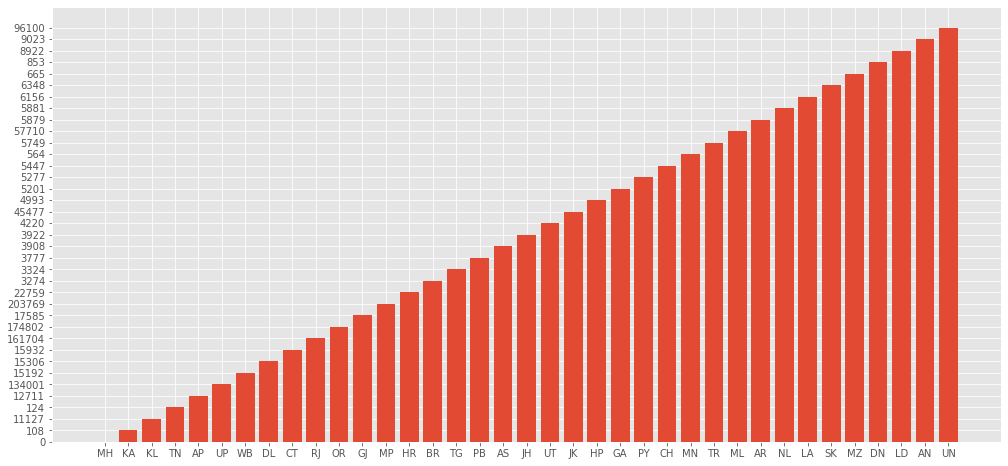

In [24]:
#Matplotlib vis

plt.bar(df['statecode'],df['active'].sort_values(ascending=True)) #statecode

<BarContainer object of 37 artists>

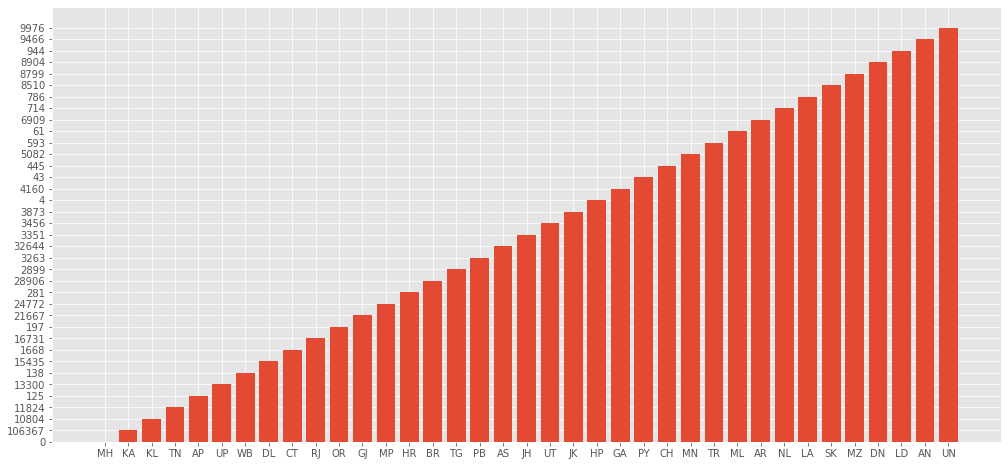

In [27]:
#px.bar(df,x='statecode',y='deaths')
plt.bar(df['statecode'],df['deaths'].sort_values(ascending=True))

<AxesSubplot:xlabel='statecode', ylabel='recovered'>

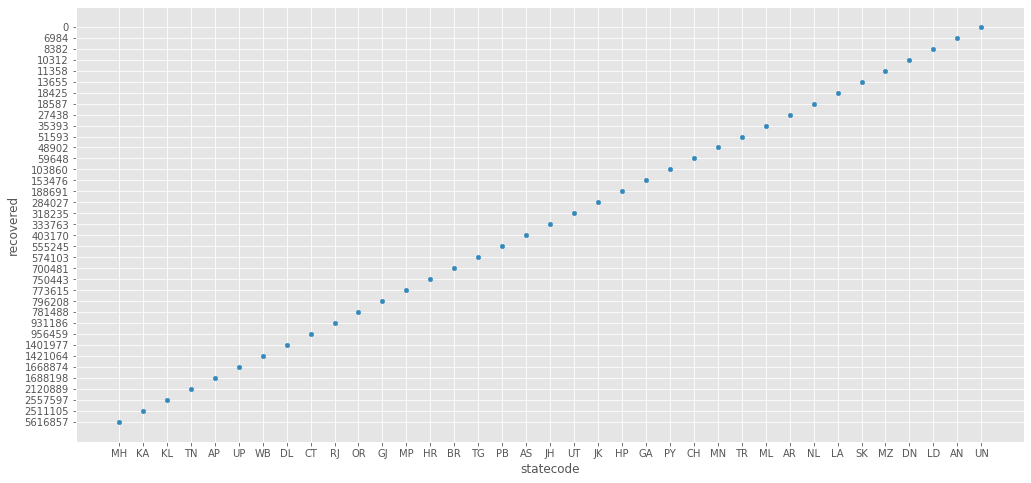

In [37]:

df.plot(kind='scatter',x='statecode',y='recovered')



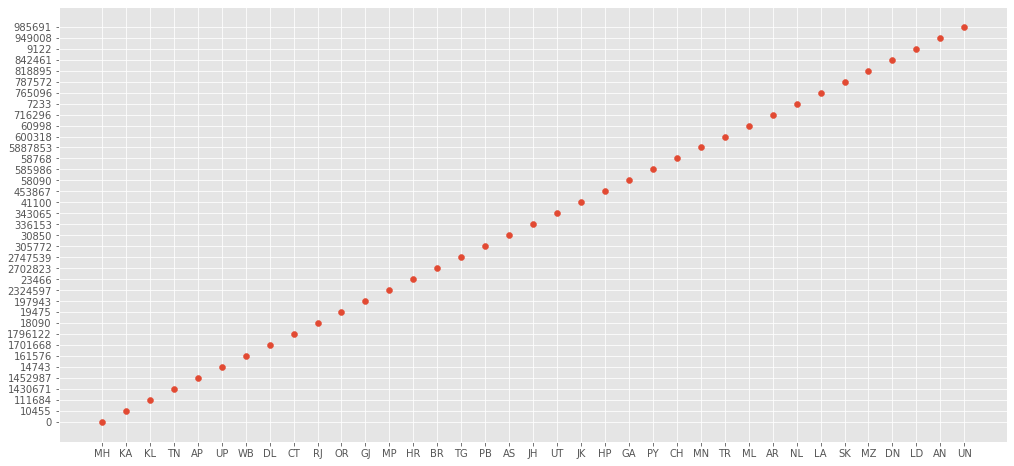

In [17]:
plt.scatter(df['statecode'],df['confirmed'].sort_values(ascending=True))

Migrated People due to covid

In [38]:
#Plotly
df.iplot(kind='bar',x='statecode',y='migratedother')

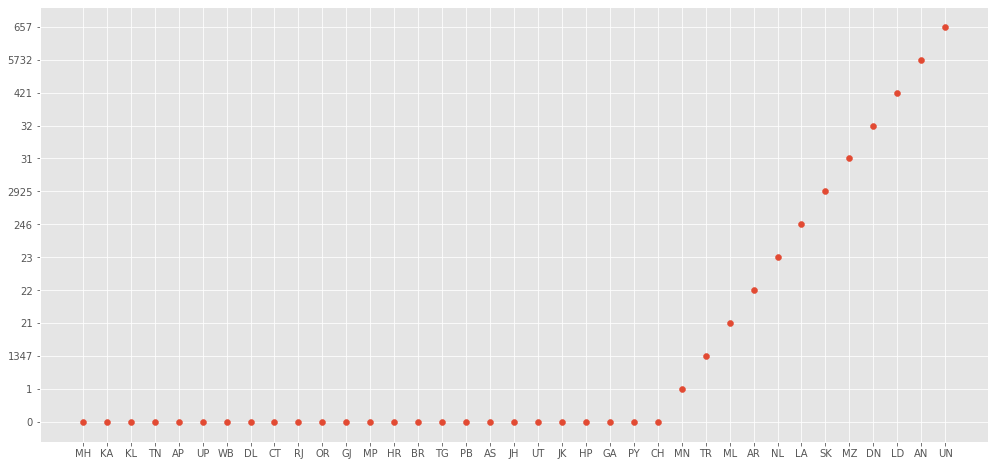

In [39]:
plt.scatter(df['statecode'],df['migratedother'].sort_values(ascending=True))